<a href="https://colab.research.google.com/github/shanzsal/DAPorto/blob/main/CapstoneProjectDCS_E_coliresistance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation

In [ ]:
# Upload File Dataset CSV
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Read file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Cek isi
df.head()


Saving BVBRC_E.coli_Dataset.csv to BVBRC_E.coli_Dataset.csv


/tmp/ipython-input-3367742497.py:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


,Taxon ID,Genome ID,Genome Name,Antibiotic,Resistant Phenotype,Measurement,Measurement Sign,Measurement Value,Measurement Unit,Laboratory Typing Method,...,Laboratory Typing Platform,Vendor,Testing Standard,Testing Standard Year,Computational Method,Computational Method Version,Computational Method Performance,Evidence,Source,PubMed
0,562,562.144628,Escherichia coli 10,ceftriaxone,NaN,<=0.25,<=,0.25,mg/L,MIC,...,NaN,NaN,CLSI,2018.0,NaN,NaN,NaN,Laboratory Method,NaN,36165686
1,562,562.569100,Escherichia coli CVM N36113PS,trimethoprim/sulfamethoxazole,NaN,<=0.12,<=,0.12,mg/L,Broth dilution,...,Sensititre,Thermo Fisher Scientific,CLSI,NaN,NaN,NaN,NaN,Laboratory Method,26142410,26142410
2,562,562.144245,Escherichia coli ERR7221502,meropenem,Susceptible,NaN,NaN,NaN,NaN,Broth dilution,...,VITEK 2,BioMerieux,EUCAST,2016.0,NaN,NaN,NaN,Laboratory Method,NaN,36916881
3,562,562.100003,Escherichia coli c1b4da3e-7bb9-11e9-a8d3-68b59...,trimethoprim/sulfamethoxazole,Susceptible,NaN,NaN,NaN,NaN,Disk diffusion,...,NaN,NaN,EUCAST,NaN,NaN,NaN,NaN,Laboratory Method,NaN,NaN
4,562,562.658140,Escherichia coli strain V139,cefepime,Resistant,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratory Method,NaN,27208899


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195795 entries, 0 to 195794
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Taxon ID                          195795 non-null  int64  
 1   Genome ID                         195795 non-null  float64
 2   Genome Name                       195795 non-null  object 
 3   Antibiotic                        195795 non-null  object 
 4   Resistant Phenotype               95178 non-null   object 
 5   Measurement                       122262 non-null  object 
 6   Measurement Sign                  88052 non-null   object 
 7   Measurement Value                 122274 non-null  object 
 8   Measurement Unit                  122262 non-null  object 
 9   Laboratory Typing Method          192629 non-null  object 
 10  Laboratory Typing Method Version  162 non-null     object 
 11  Laboratory Typing Platform        41663 non-null   o

In [ ]:
# Daftar kolom penting yang wajib ada untuk analisis
required_columns = [
    'Genome ID',
    'Genome Name',
    'Antibiotic',
    'Resistant Phenotype',
    'Measurement Value',
    'Measurement Unit',
    'Testing Standard'
]

df_clean = df.dropna(subset=required_columns)

print(f"Jumlah baris sebelum cleaning: {df.shape[0]}")
print(f"Jumlah baris sesudah cleaning: {df_clean.shape[0]}")

df_clean['Measurement Value'] = pd.to_numeric(df_clean['Measurement Value'], errors='coerce')
df_clean['Antibiotic'] = df_clean['Antibiotic'].str.strip().str.title()
df_clean.isnull().sum()

print("\nCek missing values:")
print(df_clean.isnull().sum())


# Lihat data bersih
df_clean.head()



Jumlah baris sebelum cleaning: 195795
Jumlah baris sesudah cleaning: 21443

Cek missing values:
Taxon ID                                0
Genome ID                               0
Genome Name                             0
Antibiotic                              0
Resistant Phenotype                     0
Measurement                             0
Measurement Sign                     3647
Measurement Value                    1043
Measurement Unit                        0
Laboratory Typing Method                0
Laboratory Typing Method Version    21282
Laboratory Typing Platform           6894
Vendor                               4544
Testing Standard                        0
Testing Standard Year               19228
Computational Method                21443
Computational Method Version        21443
Computational Method Performance    21443
Evidence                             2108
Source                              21443
PubMed                               7736
dtype: int64


/tmp/ipython-input-2945279189.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Measurement Value'] = pd.to_numeric(df_clean['Measurement Value'], errors='coerce')
/tmp/ipython-input-2945279189.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Antibiotic'] = df_clean['Antibiotic'].str.strip().str.title()


,Taxon ID,Genome ID,Genome Name,Antibiotic,Resistant Phenotype,Measurement,Measurement Sign,Measurement Value,Measurement Unit,Laboratory Typing Method,...,Laboratory Typing Platform,Vendor,Testing Standard,Testing Standard Year,Computational Method,Computational Method Version,Computational Method Performance,Evidence,Source,PubMed
6,562,562.77030,Escherichia coli strain 503320,Ceftriaxone,Susceptible,<=1,<=,1.0,mg/L,Broth dilution,...,VITEK 2,BioMerieux,EUCAST,NaN,NaN,NaN,NaN,Laboratory Method,NaN,30127495
14,562,562.96944,Escherichia coli VRES1184,Cefotaxime,Resistant,4,NaN,4.0,mg/L,Broth dilution,...,VITEK 2,BioMerieux,EUCAST,NaN,NaN,NaN,NaN,Laboratory Method,NaN,34485958
29,562,562.97267,Escherichia coli VREC1407,Ceftazidime,Susceptible,<=1,<=,1.0,mg/L,Broth dilution,...,VITEK 2,BioMerieux,EUCAST,NaN,NaN,NaN,NaN,Laboratory Method,NaN,34485958
47,562,562.42639,Escherichia coli strain 138,Ampicillin,Resistant,32,>=,32.0,mg/L,Broth dilution,...,VITEK 2,BioMerieux,CLSI,NaN,NaN,NaN,NaN,Laboratory Method,NaN,NaN
64,562,562.50293,Escherichia coli strain URMC_20,Ampicillin,Resistant,>=32,>=,32.0,mg/L,Broth dilution,...,NaN,NaN,CLSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_clean.to_excel("data_resistance_clean.xlsx", index=False)

from google.colab import files
files.download("data_resistance_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Summmarization and Classification Prompt to IBM Granite

In [ ]:
# Import Library yang diperlukan

!pip install pandas seaborn langchain langchain-community replicate ipywidgets

from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set API
os.environ["REPLICATE_API_TOKEN"] = userdata.get("api_token")

# Inisialisasi model
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={"temperature": 0.3, "max_new_tokens": 1024}
)

# Reload widget
%reload_ext autoreload
%autoreload 2
%matplotlib inline


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_community.llms import Replicate
import pandas as pd

# Load file excel data bersih
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

# Baca hanya 30 baris pertama dari Excel (sampel dataset agar tidak error saat running prompt yang kebesaran)
df = pd.read_excel(filename, nrows=30)
columns_info = list(df.columns)

# Susun prompt klasifikasi ===
prompt_klasifikasi = f"""
Dari data 30 baris pertama, klasifikasikan antibiotik mana yang paling banyak memiliki phenotype Resistant (misalnya: Non-susceptible).
Tampilkan nama antibiotik, jenis phenotype, dan jumlah datanya.
Kolom: {list(df.columns)}
Contoh data: {df.head(20).to_dict(orient="records")}
"""

llm = Replicate(
    model="meta/meta-llama-3-70b-instruct",
    model_kwargs={"temperature": 0.2},
)

response = llm.invoke([HumanMessage(content=prompt_klasifikasi)])

#Extract hasil klasifikasi dari IBM Granite
import io
from IPython.display import FileLink
hasil_text = response

# Contoh output dari AI dalam bentuk tabel teks:
# Antibiotic         | Phenotype       | Count
# ------------------ | --------------- | -----
# Cefotaxime         | Non-susceptible | 45
# Ciprofloxacin      | Resistant       | 32

import re
lines = hasil_text.strip().split('\n')

# Cari header dan isi
data_rows = [re.split(r'\s*\|\s*', line.strip()) for line in lines if "|" in line]
headers = data_rows[0]
rows = data_rows[1:]

result_df = pd.DataFrame(rows, columns=headers)

# Save ke excel dan download file output
output_filename = "hasil_klasifikasi_antibiotik.xlsx"
result_df.to_excel(output_filename, index=False)

from google.colab import files
files.download(output_filename)

Saving data_resistance_clean.xlsx to data_resistance_clean (7).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Baca file
df = pd.read_excel("data_resistance_clean.xlsx")

# Jenis data yang akan diolah
# - Antibiotic
# - Phenotype
# - Strain

# Cleaning Data
df_clean = df.dropna(subset=['Genome ID'])

df_clean['Genome ID'] = df_clean['Genome ID'].astype(str)

grouped = df_clean.groupby(['Antibiotic', 'Resistant Phenotype'])['Genome ID'].agg(
    lambda x: ', '.join(sorted(set(x))) + f" ({len(set(x))})"
).reset_index()

# Buat Pivot tabel
pivot_df = grouped.pivot(index='Antibiotic', columns='Resistant Phenotype', values='Genome ID')

# Save as Excel
pivot_df.to_excel("klasifikasi_antibiotik_phenotype_genomeID.xlsx")

from google.colab import files
files.download("klasifikasi_antibiotik_phenotype_genomeID.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

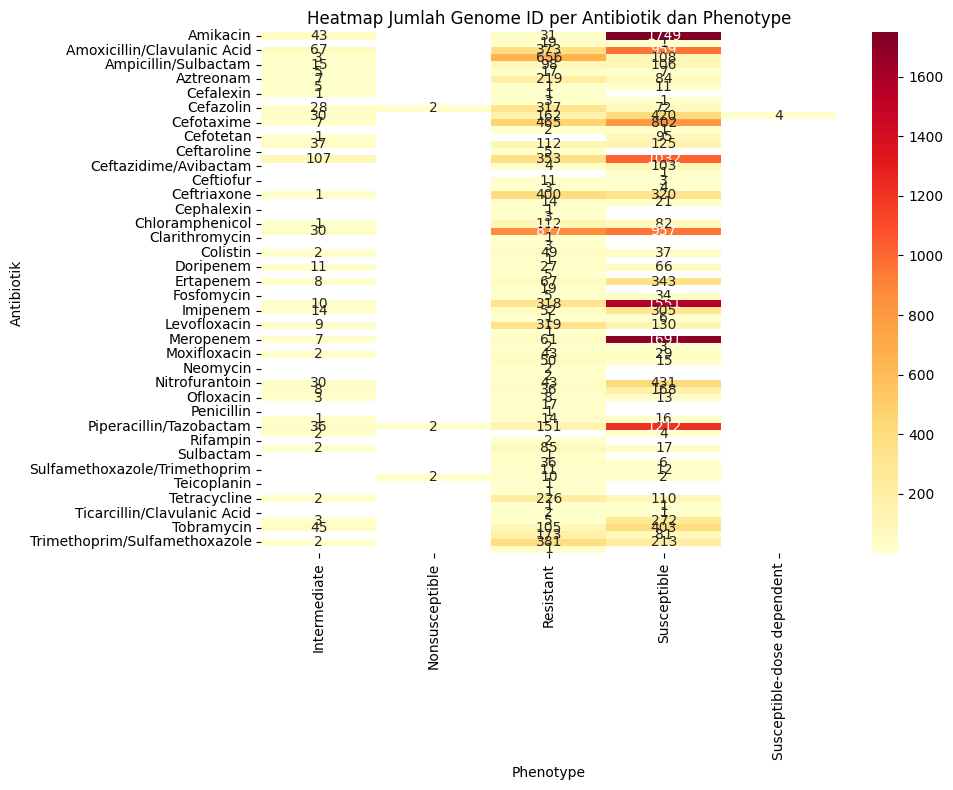

In [ ]:
# Visualisasi Data Klasifikasi

import matplotlib.pyplot as plt
import seaborn as sns

# Buat pivot tabel jumlah Genome ID
pivot_count = count_df.pivot(index='Antibiotic', columns='Resistant Phenotype', values='Genome Count')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_count, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Heatmap Jumlah Genome ID per Antibiotik dan Phenotype')
plt.ylabel('Antibiotik')
plt.xlabel('Phenotype')
plt.tight_layout()
plt.show()


In [ ]:
# Kirimm data ke Model IBM Granite untuk Summarization

sample = df_clean.head(100).to_dict(orient='records')

prompt =f"""
You are a biomedical data secientist. Analyze the following antibiotic resistance data to Escherichia Coli.
Summarize key trends and suggest possible insights or research diresctions.
Data: {sample}
"""

response = llm.invoke(prompt)
print(response)

<|im_start|>assistant<|im_sep|>### Summary of Key Trends and Insights from Antibiotic Resistance Data for Escherichia Coli

This dataset provides antibiotic resistance profiles for multiple Escherichia coli strains, utilizing various antibiotics and laboratory testing methods. Here are the key trends and insights derived from the data:

1. **Prevalence of Resistance**:
   - Several strains exhibit resistance to antibiotics commonly used to treat E. coli infections, such as Ampicillin, Cefotaxime, Cefotaxime, Ceftazidime, Ciprofloxacin, Piperacillin/Tazobactam, and Trimethoprim.
   - Resistance to Ampicillin is particularly common, with multiple strains showing resistance (e.g., strains 138, URMC_20, 503320).
   - Resistance to third-generation cephalosporins (Cefotaxime, Ceftazidime) is also noted in various strains (e.g., VRES1184, VREC1407).

2. **Susceptibility Patterns**:
   - Many strains remain susceptible to antibiotics such as Ceftriaxone, Ceftazidime, Amikacin, Gentamicin, Nit

# Exploratory Data Analysis

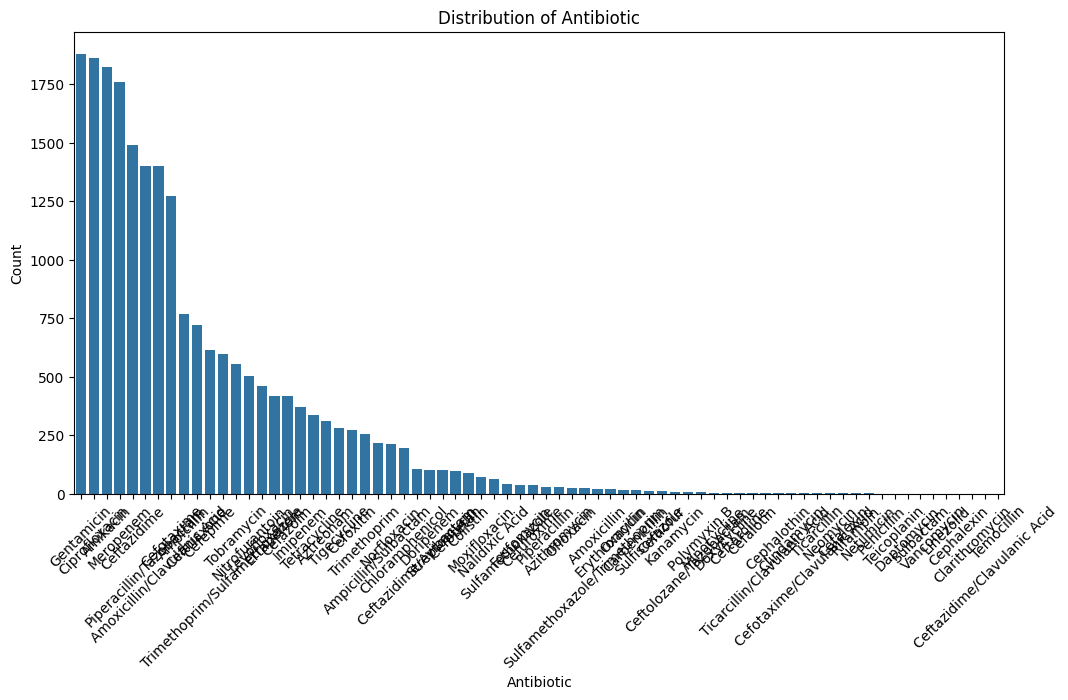

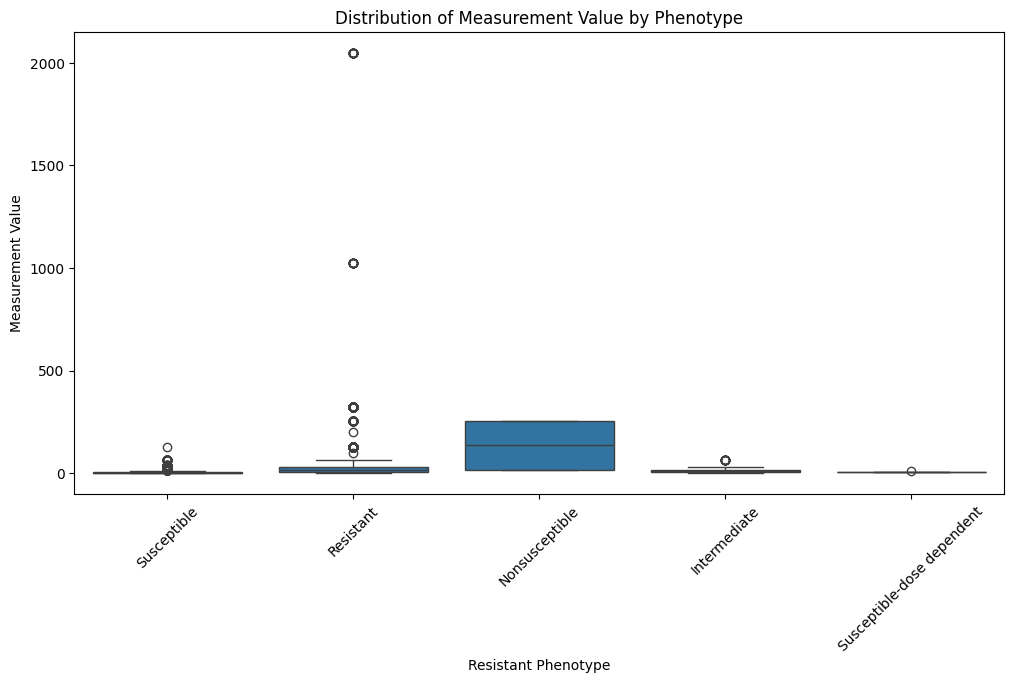

In [ ]:
# Visualisasi

import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi nilai resistensi per antibiotik
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Antibiotic', order=df_clean['Antibiotic'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Antibiotic')
plt.ylabel('Count')
plt.title('Distribution of Antibiotic')
plt.show()

# Boxplot nilai pengukuran per phenotype
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Resistant Phenotype', y='Measurement Value')
plt.xticks(rotation=45)
plt.xlabel('Resistant Phenotype')
plt.ylabel('Measurement Value')
plt.title("Distribution of Measurement Value by Phenotype")
plt.show()

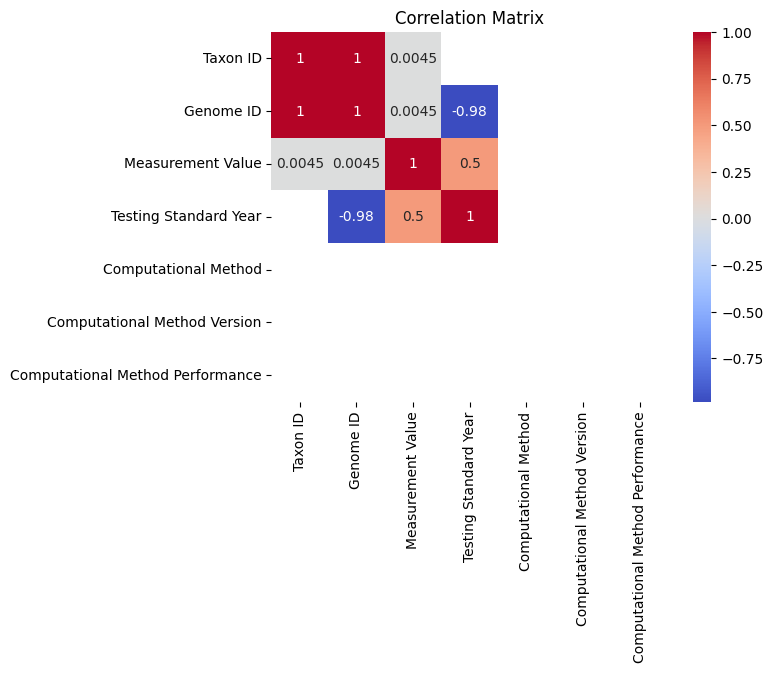

In [ ]:
# Korelasi

sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Statistik Deskriptif

df_clean.describe()
df_clean['Resistant Phenotype'].value_counts()
df_clean['Antibiotic'].value_counts()
df_clean['Measurement Unit'].value_counts()
df_clean['Testing Standard'].value_counts()

,count
Testing Standard,
EUCAST,11748
CLSI,8871
eucast,695
missing,51
clsi,48
SFM,30
